# Cleaning data

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

## Loading data

In [2]:
def load_data():
    churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")
    return churnData
churnData = load_data()

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Datatypes

In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
def convert_to_numeric(churnData):
    churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
    return churnData
churnData = convert_to_numeric(churnData)

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

## Null values

In [7]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [8]:
def replace_null_values(churnData):
    mean_TotalCharges = np.mean(churnData['TotalCharges'])
    churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_TotalCharges)
    return churnData
churnData = replace_null_values(churnData)

In [9]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

# Numeric features

In [10]:
def drop_columns(churnData):
    churnData_features = churnData.drop(columns=['gender','Partner','Dependents',
                                                  'PhoneService','OnlineSecurity',
                                                  'OnlineBackup','DeviceProtection',
                                                  'TechSupport','StreamingTV',
                                                  'StreamingMovies','Contract'])
    return churnData_features
churnData_features = drop_columns(churnData)

In [11]:
churnData_features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [12]:
def hot_coding_categorical_variables(churnData_features):
    categoricals_features= churnData_features.select_dtypes("object")
    print(categoricals_features)
    
    categoricals_features=pd.get_dummies(categoricals_features[['Churn']], drop_first=True)
    print(categoricals_features)
    
    #adding categorical features
    churnData_features = pd.concat([churnData_features,categoricals_features],axis=1)
    return churnData_features
churnData_features = hot_coding_categorical_variables(churnData_features)

     Churn
0       No
1       No
2      Yes
3       No
4      Yes
...    ...
7038    No
7039    No
7040    No
7041   Yes
7042    No

[7043 rows x 1 columns]
      Churn_Yes
0             0
1             0
2             1
3             0
4             1
...         ...
7038          0
7039          0
7040          0
7041          1
7042          0

[7043 rows x 1 columns]


In [13]:
churnData_features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Churn_Yes
0,0,1,29.85,29.85,No,0
1,0,34,56.95,1889.50,No,0
2,0,2,53.85,108.15,Yes,1
3,0,45,42.30,1840.75,No,0
4,0,2,70.70,151.65,Yes,1
...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,0
7039,0,72,103.20,7362.90,No,0
7040,0,11,29.60,346.45,No,0
7041,1,4,74.40,306.60,Yes,1


## Data splitting

In [14]:
def define_x_y(churnData_features):
    X = churnData_features.drop(columns=['Churn','Churn_Yes'], axis = 1)
    y = churnData_features['Churn_Yes']
    return X, y
X,y = define_x_y(churnData_features)

In [15]:
def data_splitting(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test  = pd.DataFrame(X_test, columns=X.columns)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = data_splitting(X,y)

## Models

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.794320,0.786086
1,Precision,0.669283,0.629820
2,Recall,0.453647,0.443038



Confusion matrix for the train set
[[3319  295]
 [ 719  597]]


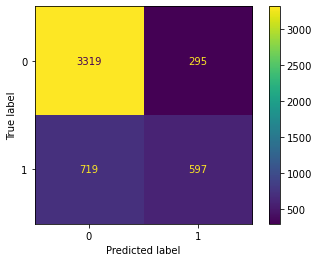


Confusion matrix for the test set
[[1416  144]
 [ 308  245]]


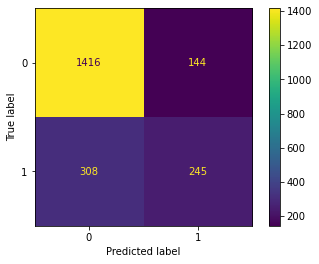

In [16]:
def logistic_regression_model(X_train, X_test, y_train, y_test):

    trans = PowerTransformer() # The same as standard scaler

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    log_model = LogisticRegression() 
    
    log_model.fit(X_train_mod, y_train)

    y_pred_train_log = log_model.predict(X_train_mod)
    y_pred_test_log = log_model.predict(X_test_mod)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
    display(performance_log)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_log))
    plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_log))
    plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
    plt.show()
    
    return log_model, performance_log
log_model, performance_log = logistic_regression_model(X_train, X_test, y_train, y_test)

### Knn Classifier model

,Error_metric,Train,Test
0,Accuracy,0.835903,0.774728
1,Precision,0.734940,0.584615
2,Recall,0.602584,0.481013



Confusion matrix for the train set
[[3328  286]
 [ 523  793]]


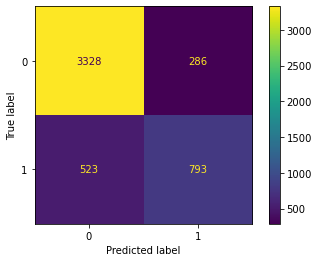


Confusion matrix for the test set
[[1371  189]
 [ 287  266]]


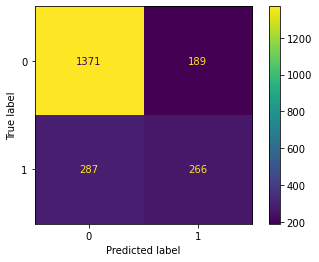

In [17]:
def knn_classifier_model(X_train, X_test, y_train, y_test):

    trans = PowerTransformer()

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    neigh = KNeighborsClassifier() #Import KNeighborsClassifier to use the K-NN for classification
    
    neigh.fit(X_train_mod, y_train)

    y_pred_train_knn = neigh.predict(X_train_mod)
    y_pred_test_knn = neigh.predict(X_test_mod)

    performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})
    display(performance_knn)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_knn))
    plot_confusion_matrix(neigh,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_knn))
    plot_confusion_matrix(neigh, X_test_mod, y_test, values_format = 'd')
    plt.show()
    
    return performance_knn, neigh
performance_knn, neigh = knn_classifier_model(X_train, X_test, y_train, y_test)

### Decision Tree Classifier

,Error_metric,Train,Test
0,Accuracy,0.800203,0.784666
1,Precision,0.681668,0.620690
2,Recall,0.471884,0.455696


Confusion matrix for the train set
[[3324  695]
 [ 290  621]]


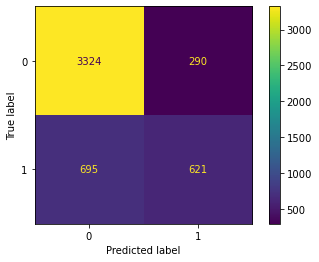


Confusion matrix for the test set
[[1406  301]
 [ 154  252]]


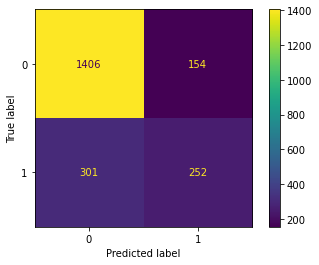

In [18]:
def decision_tree_classifier_model(X_train, X_test, y_train, y_test):

    # Bear in mind that sklearn uses a different function for decission trees used for 
    # classification (to predict a categorical feature): DecisionTreeClassifier() 
    dt = DecisionTreeClassifier(max_depth=5)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_dt = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
    display(performance_dt)

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train, y_pred_train_dt).T)
    plot_confusion_matrix(dt, X_train, y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_dt).T)
    plot_confusion_matrix(dt, X_test, y_test, values_format = 'd')
    plt.show()
    
    return dt, performance_dt
dt, performance_dt = decision_tree_classifier_model(X_train, X_test, y_train, y_test)

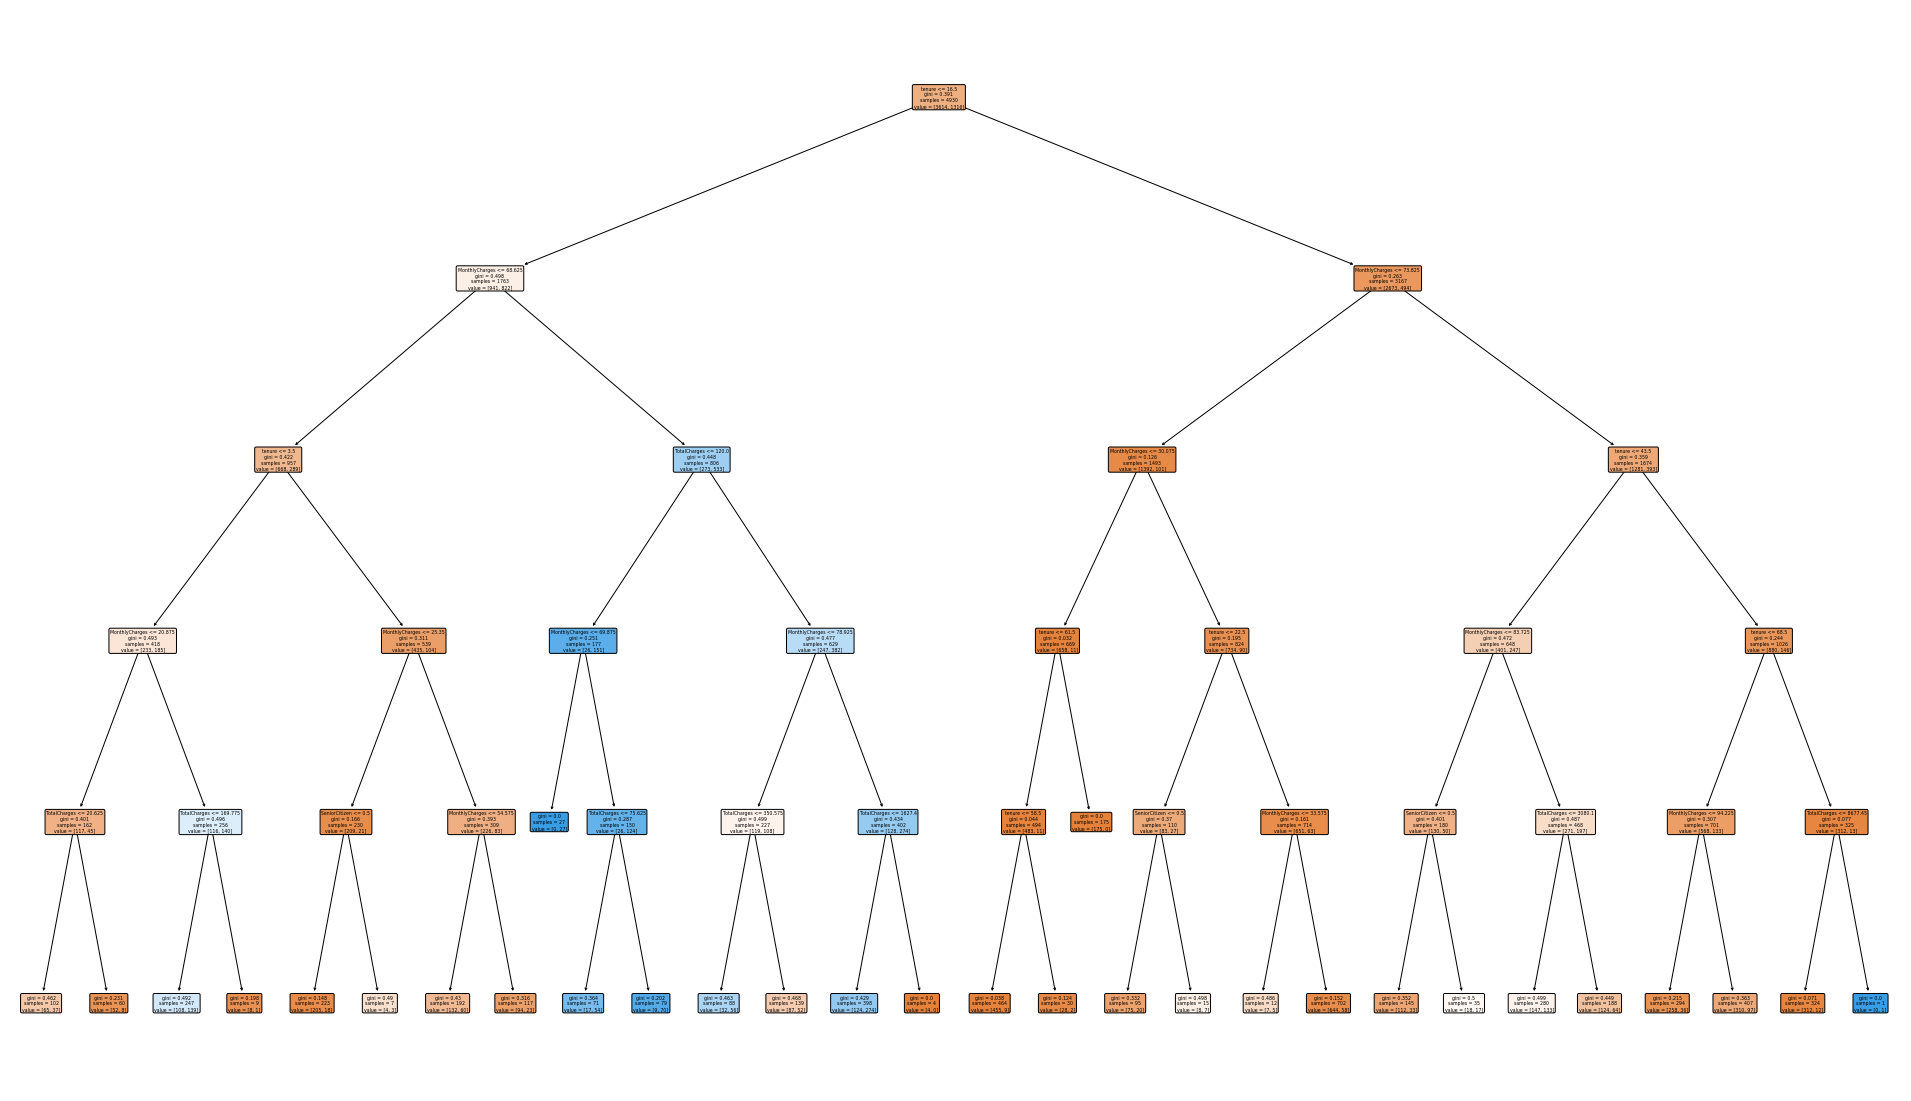

In [19]:
fig, axes= plt.subplots(nrows= 1, ncols= 1, figsize= (34, 20))

plot_tree(dt, filled=True, rounded= True, feature_names= X.columns)
plt.show() 

### Random Forest Classifier 

,Error_metric,Train,Test
0,Accuracy,0.803448,0.792239
1,Precision,0.695603,0.649215
2,Recall,0.468845,0.448463


Confusion matrix for the train set
[[3344  699]
 [ 270  617]]


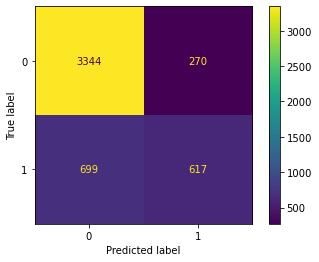


Confusion matrix for the test set
[[1426  305]
 [ 134  248]]


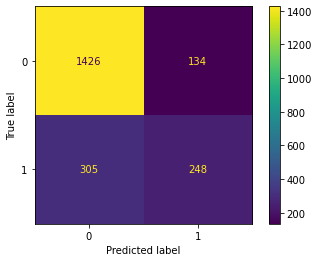

In [20]:
def random_forest_classifier_model(X_train, X_test, y_train, y_test):

    clf = RandomForestClassifier(max_depth=5, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train_clf = clf.predict(X_train)
    y_pred_test_clf = clf.predict(X_test)

    performance_clf = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_clf),
                                         precision_score(y_train, y_pred_train_clf),
                                         recall_score(y_train, y_pred_train_clf)],
                               'Test': [accuracy_score(y_test, y_pred_test_clf),
                                        precision_score(y_test, y_pred_test_clf),
                                        recall_score(y_test, y_pred_test_clf)]})
    display(performance_clf)

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train, y_pred_train_clf).T)
    plot_confusion_matrix(clf, X_train, y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_clf).T)
    plot_confusion_matrix(clf, X_test, y_test, values_format = 'd')
    plt.show()
    
    return clf, performance_clf
clf, performance_clf = random_forest_classifier_model(X_train, X_test, y_train, y_test)  

## Error metric comparison

In [21]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(max_depth=5)
model4 = RandomForestClassifier(max_depth=5, random_state=0)

model_pipeline = [model1, model2, model3, model4]
model_names = ['LogReg', 'KNNClass', 'DTree', 'RForest']
comparison_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall']})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

i=0
for model in model_pipeline:
    if model == model1:
        std_scaler = StandardScaler().fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test  = std_scaler.transform(X_test)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   model_names[i]+'_Train': [accuracy_score(y_train, y_pred_train),
                                             precision_score(y_train, y_pred_train),
                                             recall_score(y_train, y_pred_train)],
                                   model_names[i]+'_Test': [accuracy_score(y_test, y_pred_test),
                                            precision_score(y_test, y_pred_test),
                                            recall_score(y_test, y_pred_test)]})
    comparison_df = comparison_df.merge(performance_df, on='Error_metric')
    i = i+1

comparison_df

,Error_metric,LogReg_Train,LogReg_Test,KNNClass_Train,KNNClass_Test,DTree_Train,DTree_Test,RForest_Train,RForest_Test
0,Accuracy,0.790669,0.788452,0.790669,0.788452,0.790669,0.788452,0.790669,0.788452
1,Precision,0.651709,0.631841,0.651709,0.631841,0.651709,0.631841,0.651709,0.631841
2,Recall,0.463526,0.459313,0.463526,0.459313,0.463526,0.459313,0.463526,0.459313


## K-fold cross validation

In [22]:
def cross_validation(X_train, y_train):
    model1 = DecisionTreeClassifier(max_depth=5)
    model2 = LogisticRegression() 
    model3 = KNeighborsClassifier()
    model4 = RandomForestClassifier(max_depth=5, random_state=0)

    model_pipeline = [model1, model2, model3, model4]
    model_names = ['Regression Tree', 'Logistic Regression', 'KNN', 'Random Forest']
    scores = {}
    i=0
    for model in model_pipeline:
        mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
        scores[model_names[i]] = mean_score
        i = i+1

    print(scores)
    return scores
scores = cross_validation(X_train, y_train)

{'Regression Tree': 0.7839756592292089, 'Logistic Regression': 0.7880324543610547, 'KNN': 0.7736308316430021, 'Random Forest': 0.7888438133874238}


# Managing imbalance

## Downsampling

In [23]:
category_0 = churnData_features[churnData_features['Churn_Yes'] == 0]
category_1 = churnData_features[churnData_features['Churn_Yes'] == 1]

In [24]:
print(category_0.shape)
print(category_1.shape)

(5174, 6)
(1869, 6)


In [25]:
category_0_down = category_0.sample(len(category_1,))
print(category_0_down.shape)
print(category_1.shape)

(1869, 6)
(1869, 6)


In [26]:
downsampling_churnData = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
downsampling_churnData = downsampling_churnData.sample(frac=1)
downsampling_churnData['Churn_Yes'].value_counts()

1    1869
0    1869
Name: Churn_Yes, dtype: int64

### Data splitting

In [27]:
X,y = define_x_y(downsampling_churnData)

In [28]:
X_train, X_test, y_train, y_test = data_splitting(X,y)

### Models

#### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.747706,0.729055
1,Precision,0.745053,0.728546
2,Recall,0.750767,0.736283



Confusion matrix for the train set
[[977 335]
 [325 979]]


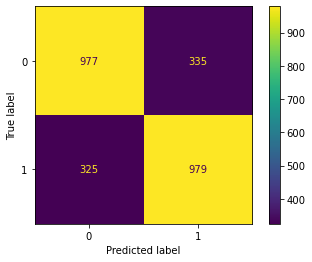


Confusion matrix for the test set
[[402 155]
 [149 416]]


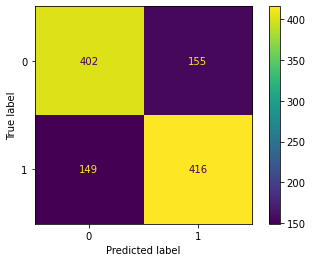

In [29]:
log_model, performance_log = logistic_regression_model(X_train, X_test, y_train, y_test)

#### Knn Classifier model

,Error_metric,Train,Test
0,Accuracy,0.802370,0.722816
1,Precision,0.792565,0.715986
2,Recall,0.817485,0.745133



Confusion matrix for the train set
[[1033  279]
 [ 238 1066]]


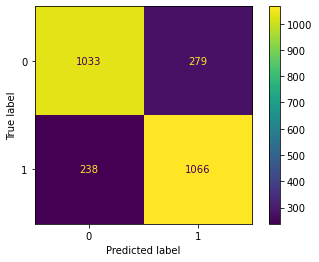


Confusion matrix for the test set
[[390 167]
 [144 421]]


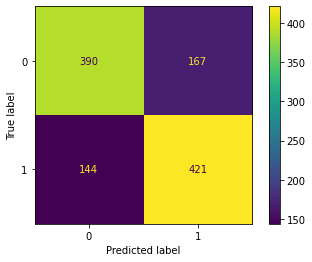

In [30]:
performance_knn, neigh = knn_classifier_model(X_train, X_test, y_train, y_test)

#### Decision Tree Classifier

,Error_metric,Train,Test
0,Accuracy,0.766437,0.740642
1,Precision,0.749101,0.733788
2,Recall,0.799080,0.761062


Confusion matrix for the train set
[[ 963  262]
 [ 349 1042]]


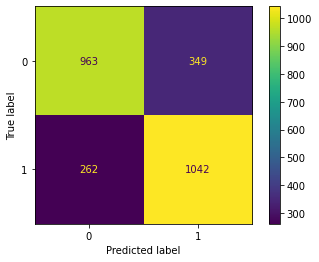


Confusion matrix for the test set
[[401 135]
 [156 430]]


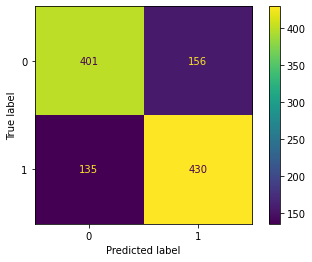

In [31]:
dt, performance_dt = decision_tree_classifier_model(X_train, X_test, y_train, y_test)

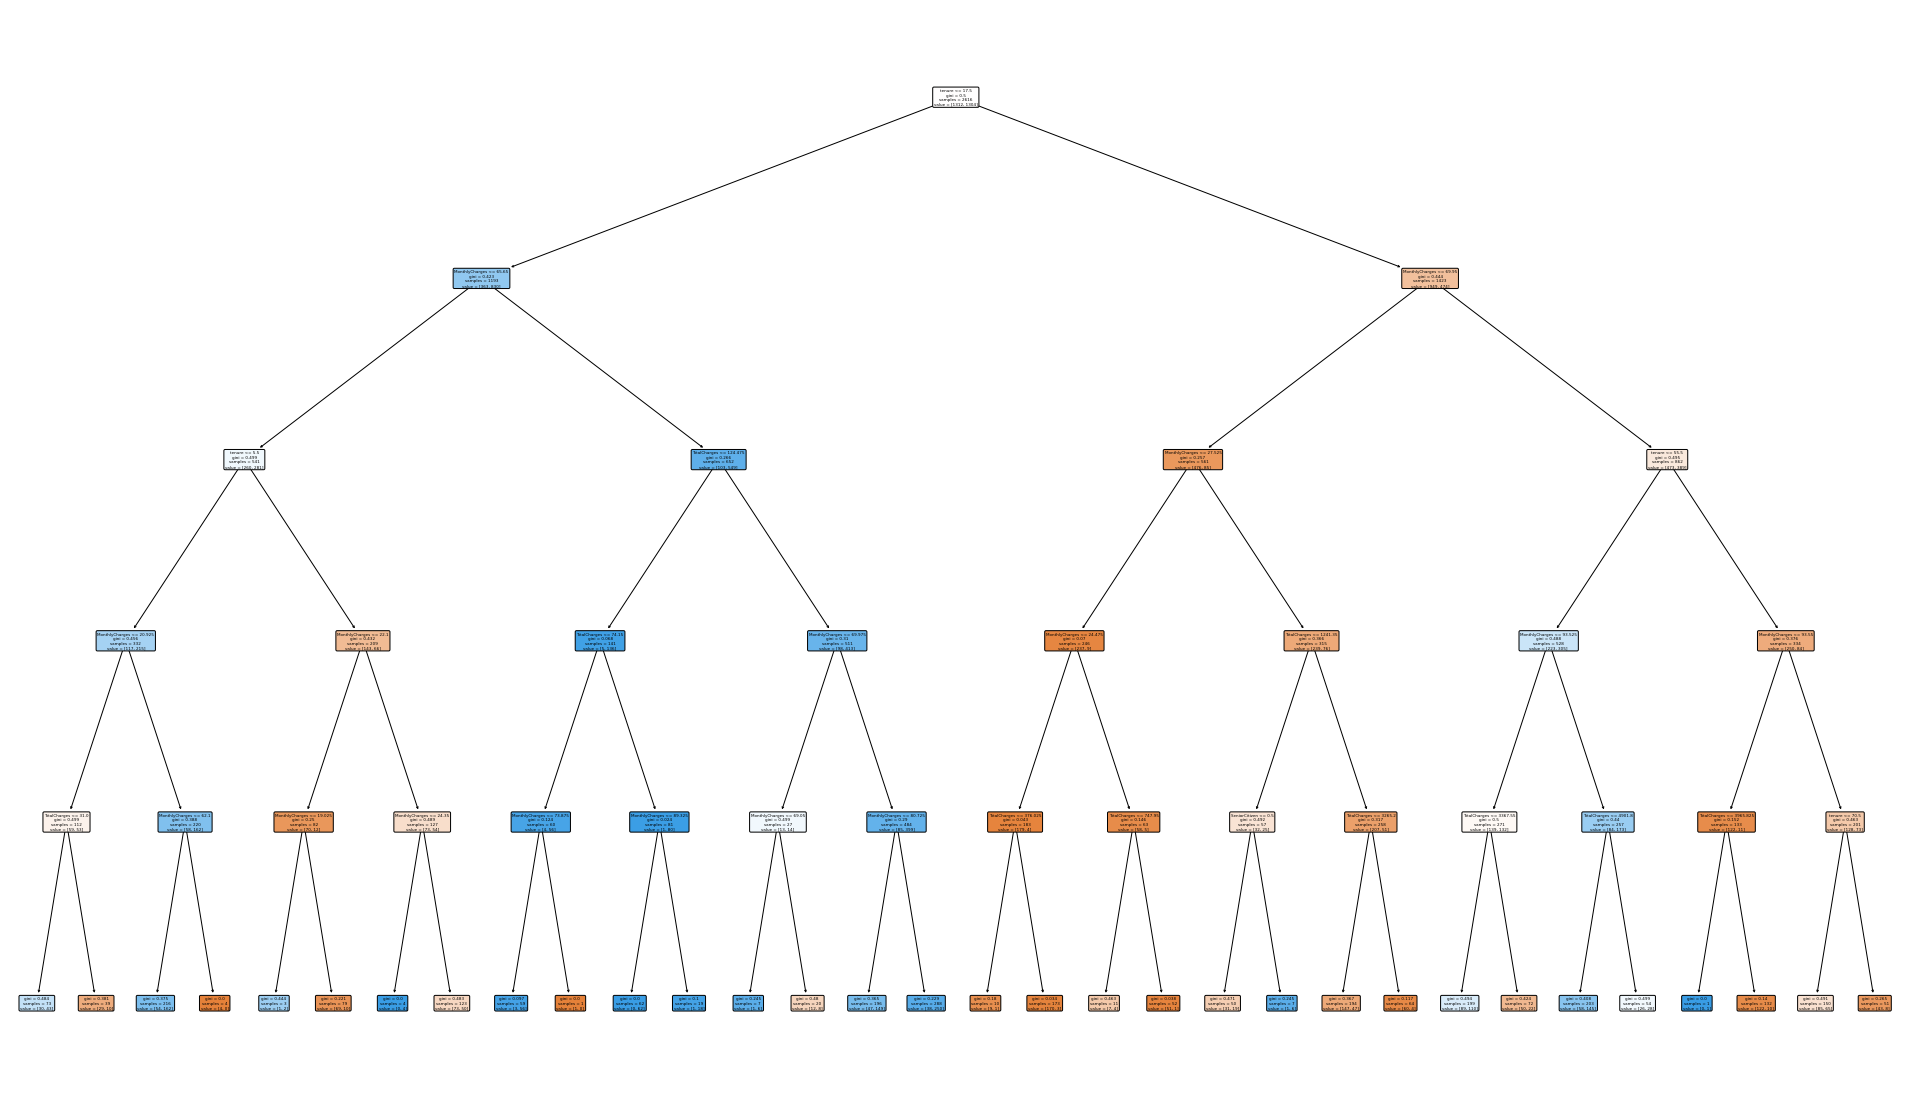

In [32]:
fig, axes= plt.subplots(nrows= 1, ncols= 1, figsize= (34, 20))

plot_tree(dt, filled=True, rounded= True, feature_names= X.columns)
plt.show() 

#### Random Forest Classifier

,Error_metric,Train,Test
0,Accuracy,0.774847,0.733512
1,Precision,0.773109,0.734155
2,Recall,0.776074,0.738053


Confusion matrix for the train set
[[1015  292]
 [ 297 1012]]


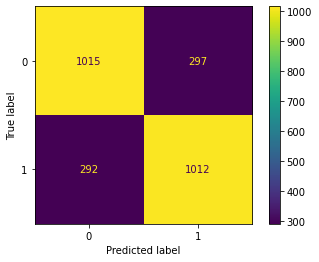


Confusion matrix for the test set
[[406 148]
 [151 417]]


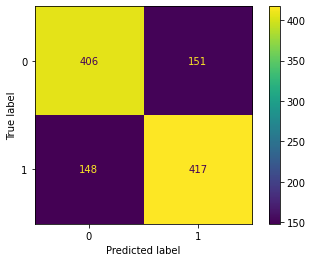

In [33]:
clf, performance_clf = random_forest_classifier_model(X_train, X_test, y_train, y_test)

### Error metric comparison

In [34]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(max_depth=5)
model4 = RandomForestClassifier(max_depth=5, random_state=0)

model_pipeline = [model1, model2, model3, model4]
model_names = ['LogReg', 'KNNClass', 'DTree', 'RForest']
comparison_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall']})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

i=0
for model in model_pipeline:
    if model == model1:
        std_scaler = StandardScaler().fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test  = std_scaler.transform(X_test)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   model_names[i]+'_Train': [accuracy_score(y_train, y_pred_train),
                                             precision_score(y_train, y_pred_train),
                                             recall_score(y_train, y_pred_train)],
                                   model_names[i]+'_Test': [accuracy_score(y_test, y_pred_test),
                                            precision_score(y_test, y_pred_test),
                                            recall_score(y_test, y_pred_test)]})
    comparison_df = comparison_df.merge(performance_df, on='Error_metric')
    i = i+1

comparison_df

,Error_metric,LogReg_Train,LogReg_Test,KNNClass_Train,KNNClass_Test,DTree_Train,DTree_Test,RForest_Train,RForest_Test
0,Accuracy,0.741972,0.721034,0.741972,0.721034,0.741972,0.721034,0.741972,0.721034
1,Precision,0.739528,0.715753,0.739528,0.715753,0.739528,0.715753,0.739528,0.715753
2,Recall,0.744632,0.739823,0.744632,0.739823,0.744632,0.739823,0.744632,0.739823


### K-fold cross validation

In [35]:
scores = cross_validation(X_train, y_train)

{'Regression Tree': 0.7324179352823552, 'Logistic Regression': 0.742744442660517, 'KNN': 0.7121626552625049, 'Random Forest': 0.7492373710098813}


## Upsampling

In [36]:
category_0 = churnData_features[churnData_features['Churn_Yes'] == 0]
category_1 = churnData_features[churnData_features['Churn_Yes'] == 1]

In [37]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 6)


In [38]:
category_1_up

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Churn_Yes
5495,0,11,73.85,926.25,Yes,1
3047,0,32,84.15,2585.95,Yes,1
5214,0,2,73.55,145.40,Yes,1
4698,1,66,80.55,5265.10,Yes,1
4810,1,15,89.85,1424.95,Yes,1
...,...,...,...,...,...,...
6375,0,1,74.30,74.30,Yes,1
371,0,2,85.65,181.50,Yes,1
6924,0,1,69.35,69.35,Yes,1
6312,0,54,105.40,5643.40,Yes,1


In [39]:
category_1_up.shape

(5174, 6)

In [40]:
upsampling_churnData = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
upsampling_churnData = upsampling_churnData.sample(frac=1)
upsampling_churnData['Churn_Yes'].value_counts()

1    5174
0    5174
Name: Churn_Yes, dtype: int64

### Data splitting

In [41]:
X,y = define_x_y(upsampling_churnData)

In [42]:
X_train, X_test, y_train, y_test = data_splitting(X,y)

### Models

#### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.729808,0.732045
1,Precision,0.728099,0.732610
2,Recall,0.731525,0.735426



Confusion matrix for the train set
[[2643  987]
 [ 970 2643]]


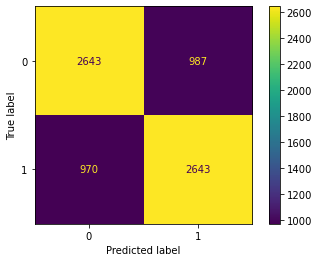


Confusion matrix for the test set
[[1125  419]
 [ 413 1148]]


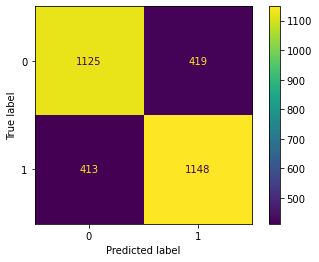

In [43]:
log_model, performance_log = logistic_regression_model(X_train, X_test, y_train, y_test)

#### Knn Classifier model

,Error_metric,Train,Test
0,Accuracy,0.846887,0.783897
1,Precision,0.806712,0.752841
2,Recall,0.911431,0.848815



Confusion matrix for the train set
[[2841  789]
 [ 320 3293]]


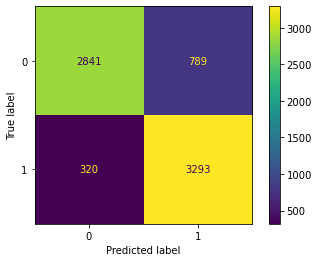


Confusion matrix for the test set
[[1109  435]
 [ 236 1325]]


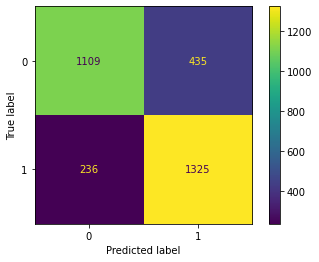

In [44]:
performance_knn, neigh = knn_classifier_model(X_train, X_test, y_train, y_test)

#### Decision tree Classifier

,Error_metric,Train,Test
0,Accuracy,0.753969,0.746216
1,Precision,0.735408,0.731299
2,Recall,0.791586,0.782832


Confusion matrix for the train set
[[2601  753]
 [1029 2860]]


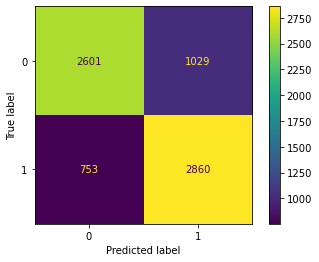


Confusion matrix for the test set
[[1095  339]
 [ 449 1222]]


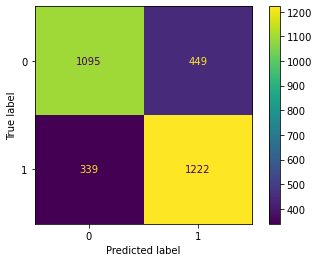

In [45]:
dt, performance_dt = decision_tree_classifier_model(X_train, X_test, y_train, y_test)

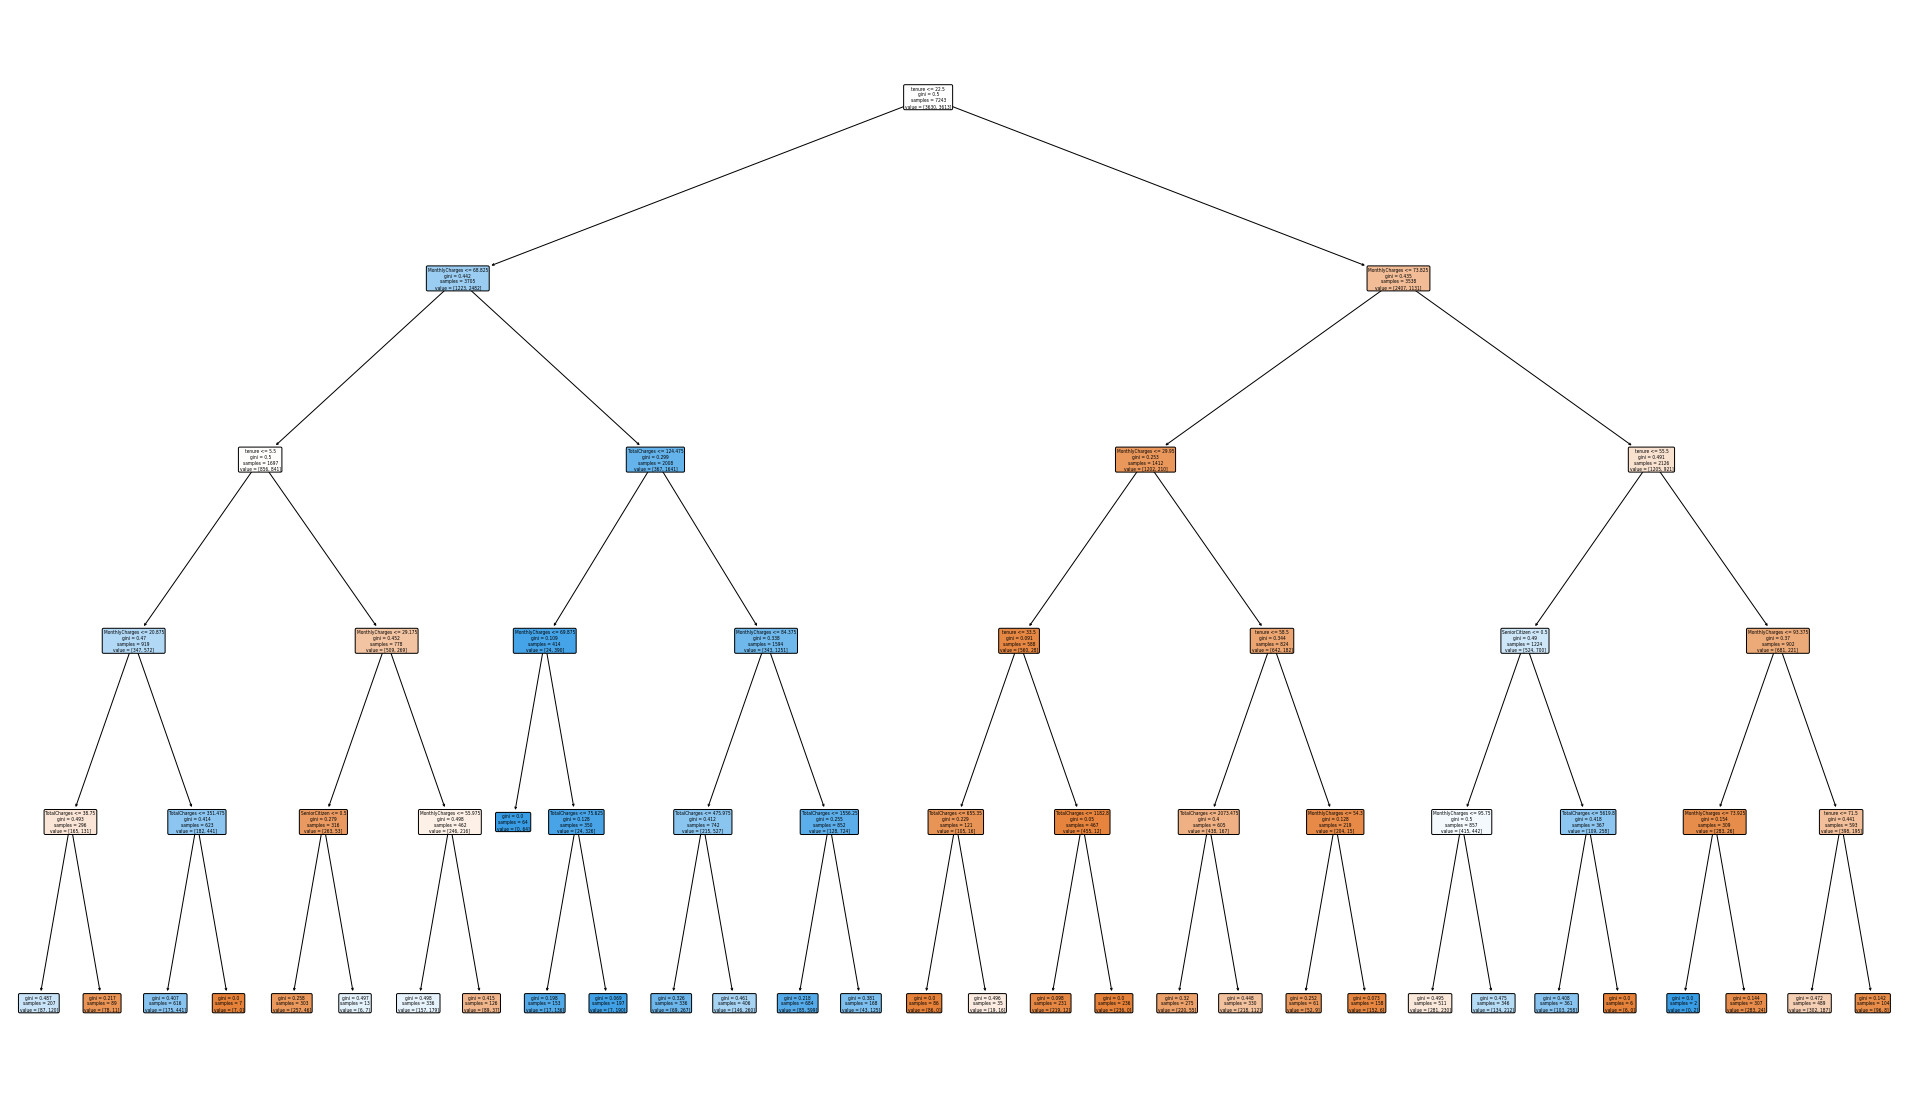

In [46]:
fig, axes= plt.subplots(nrows= 1, ncols= 1, figsize= (34, 20))

plot_tree(dt, filled=True, rounded= True, feature_names= X.columns)
plt.show() 

#### Random Forest Classifier

,Error_metric,Train,Test
0,Accuracy,0.763634,0.746216
1,Precision,0.748237,0.732411
2,Recall,0.792970,0.780269


Confusion matrix for the train set
[[2666  748]
 [ 964 2865]]


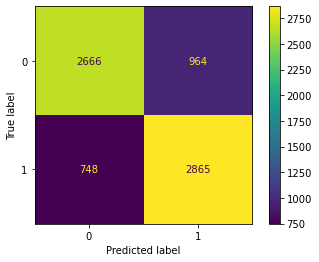


Confusion matrix for the test set
[[1099  343]
 [ 445 1218]]


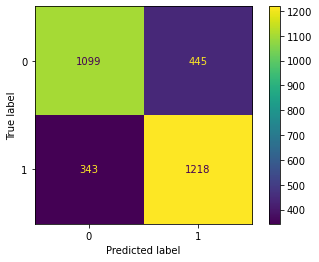

In [47]:
clf, performance_clf = random_forest_classifier_model(X_train, X_test, y_train, y_test)

### Error metric comparison

In [48]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(max_depth=5)
model4 = RandomForestClassifier(max_depth=5, random_state=0)

model_pipeline = [model1, model2, model3, model4]
model_names = ['LogReg', 'KNNClass', 'DTree', 'RForest']
comparison_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall']})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

i=0
for model in model_pipeline:
    if model == model1:
        std_scaler = StandardScaler().fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test  = std_scaler.transform(X_test)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   model_names[i]+'_Train': [accuracy_score(y_train, y_pred_train),
                                             precision_score(y_train, y_pred_train),
                                             recall_score(y_train, y_pred_train)],
                                   model_names[i]+'_Test': [accuracy_score(y_test, y_pred_test),
                                            precision_score(y_test, y_pred_test),
                                            recall_score(y_test, y_pred_test)]})
    comparison_df = comparison_df.merge(performance_df, on='Error_metric')
    i = i+1

comparison_df

,Error_metric,LogReg_Train,LogReg_Test,KNNClass_Train,KNNClass_Test,DTree_Train,DTree_Test,RForest_Train,RForest_Test
0,Accuracy,0.725114,0.731079,0.725114,0.731079,0.725114,0.731079,0.725114,0.731079
1,Precision,0.725403,0.729167,0.725403,0.729167,0.725403,0.729167,0.725403,0.729167
2,Recall,0.722391,0.739910,0.722391,0.739910,0.722391,0.739910,0.722391,0.739910


### K-fold cross validation

In [49]:
scores = cross_validation(X_train, y_train)

{'Regression Tree': 0.7447189717427526, 'Logistic Regression': 0.7259427343681487, 'KNN': 0.7576982983120384, 'Random Forest': 0.7514844491724146}


## Upsampling using SMOTE

In [50]:
smote = SMOTE()

In [51]:
y.value_counts()

1    5174
0    5174
Name: Churn_Yes, dtype: int64

In [52]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    5174
0    5174
Name: Churn_Yes, dtype: int64

### Data splitting

In [53]:
X_train, X_test, y_train, y_test = data_splitting(X_sm, y_sm)

### Models

#### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.729808,0.732045
1,Precision,0.728099,0.732610
2,Recall,0.731525,0.735426



Confusion matrix for the train set
[[2643  987]
 [ 970 2643]]


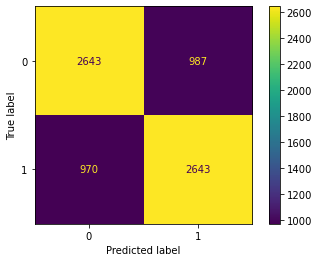


Confusion matrix for the test set
[[1125  419]
 [ 413 1148]]


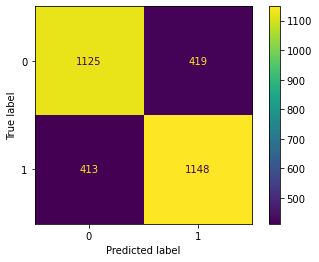

In [54]:
log_model, performance_log = logistic_regression_model(X_train, X_test, y_train, y_test)

#### Knn Classifier model

,Error_metric,Train,Test
0,Accuracy,0.846887,0.783897
1,Precision,0.806712,0.752841
2,Recall,0.911431,0.848815



Confusion matrix for the train set
[[2841  789]
 [ 320 3293]]


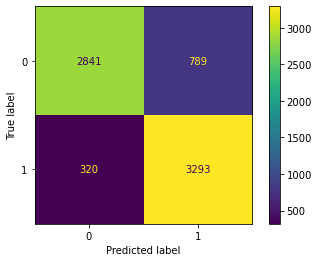


Confusion matrix for the test set
[[1109  435]
 [ 236 1325]]


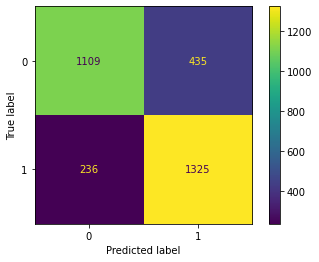

In [55]:
performance_knn, neigh = knn_classifier_model(X_train, X_test, y_train, y_test)

#### Decision tree classifier

,Error_metric,Train,Test
0,Accuracy,0.753969,0.745894
1,Precision,0.735408,0.730861
2,Recall,0.791586,0.782832


Confusion matrix for the train set
[[2601  753]
 [1029 2860]]


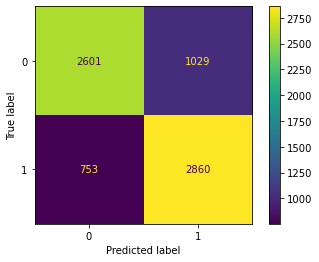


Confusion matrix for the test set
[[1094  339]
 [ 450 1222]]


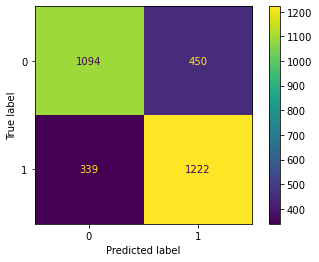

In [56]:
dt, performance_dt = decision_tree_classifier_model(X_train, X_test, y_train, y_test)

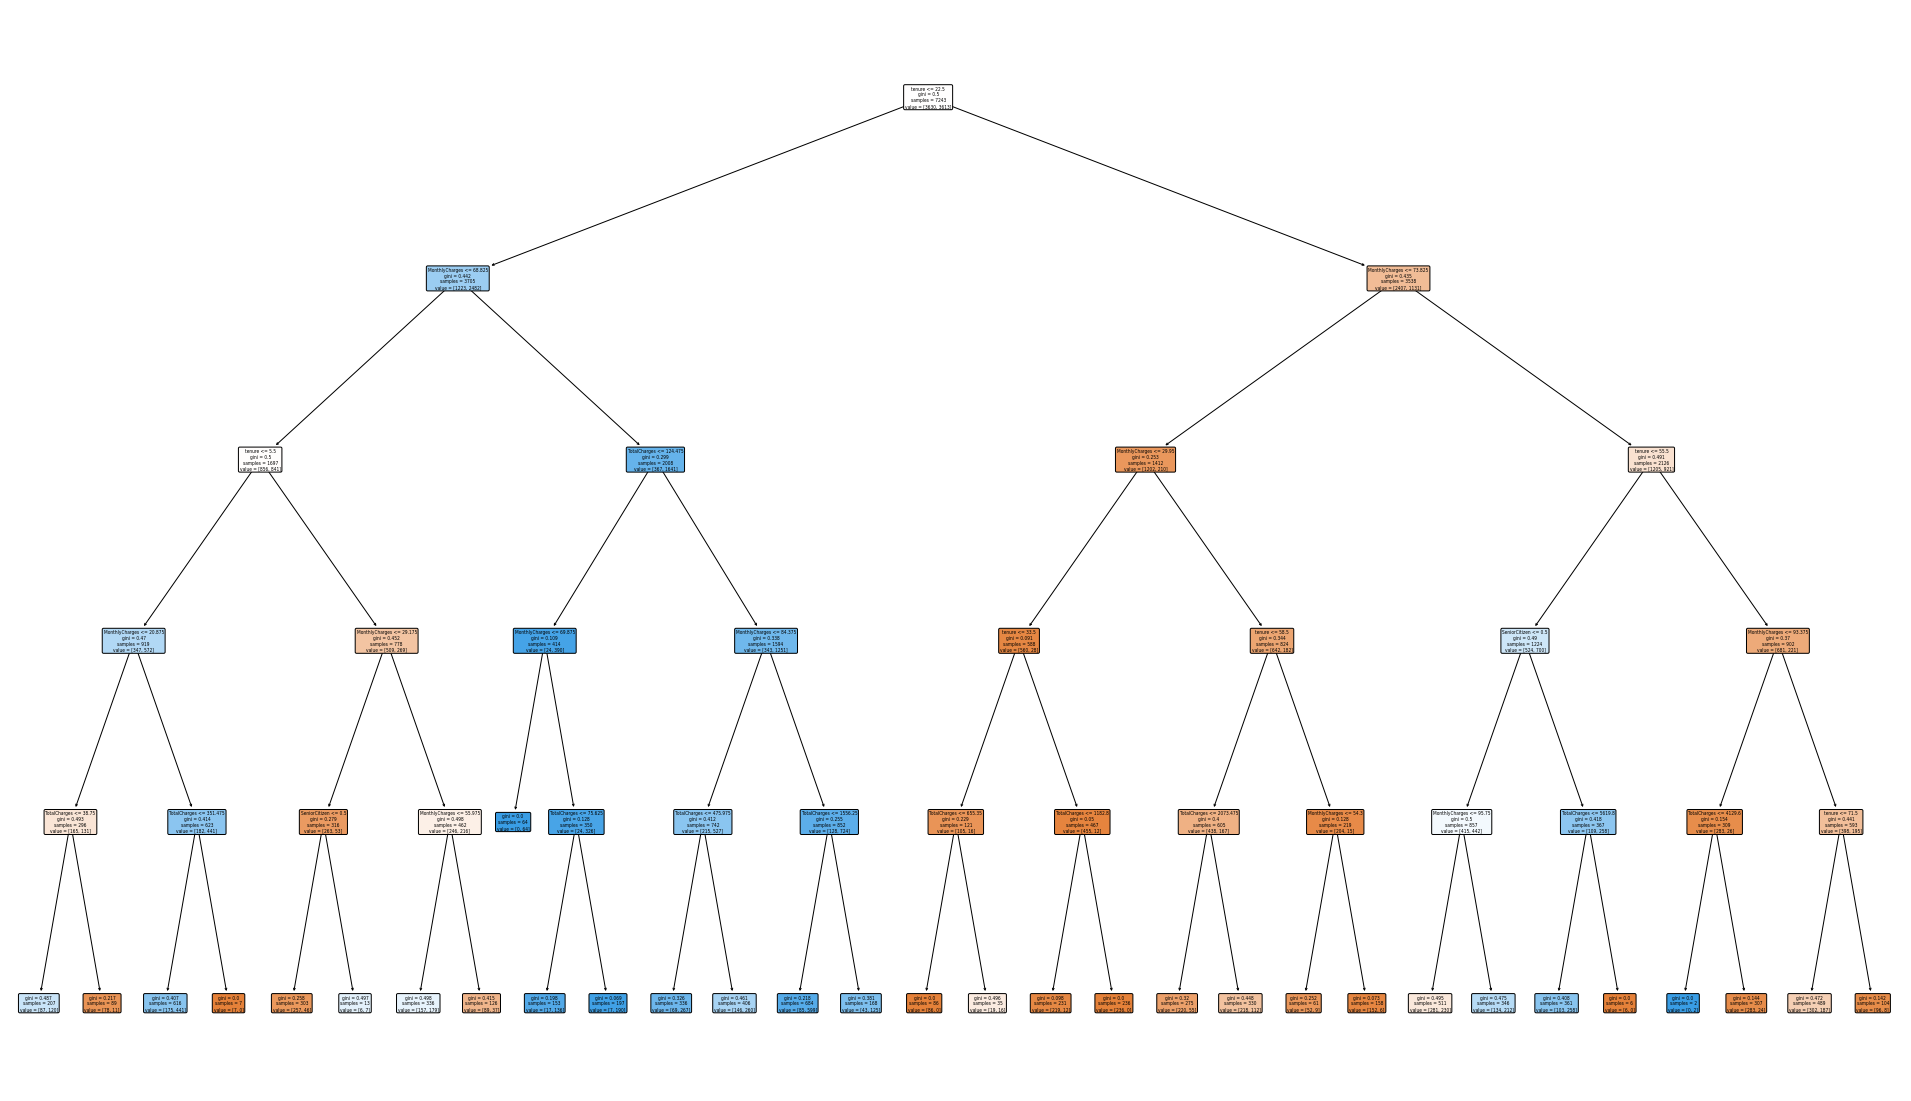

In [57]:
fig, axes= plt.subplots(nrows= 1, ncols= 1, figsize= (34, 20))

plot_tree(dt, filled=True, rounded= True, feature_names= X.columns)
plt.show() 

#### Random Forest Classifier

,Error_metric,Train,Test
0,Accuracy,0.763634,0.746216
1,Precision,0.748237,0.732411
2,Recall,0.792970,0.780269


Confusion matrix for the train set
[[2666  748]
 [ 964 2865]]


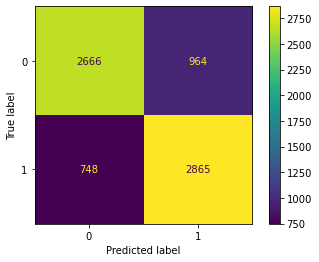


Confusion matrix for the test set
[[1099  343]
 [ 445 1218]]


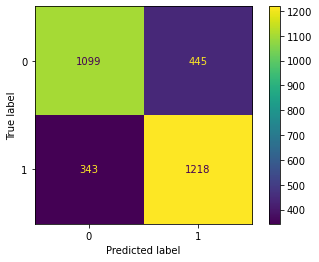

In [58]:
clf, performance_clf = random_forest_classifier_model(X_train, X_test, y_train, y_test)

### Error metric comparison

In [59]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(max_depth=5)
model4 = RandomForestClassifier(max_depth=5, random_state=0)

model_pipeline = [model1, model2, model3, model4]
model_names = ['LogReg', 'KNNClass', 'DTree', 'RForest']
comparison_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall']})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

i=0
for model in model_pipeline:
    if model == model1:
        std_scaler = StandardScaler().fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test  = std_scaler.transform(X_test)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   model_names[i]+'_Train': [accuracy_score(y_train, y_pred_train),
                                             precision_score(y_train, y_pred_train),
                                             recall_score(y_train, y_pred_train)],
                                   model_names[i]+'_Test': [accuracy_score(y_test, y_pred_test),
                                            precision_score(y_test, y_pred_test),
                                            recall_score(y_test, y_pred_test)]})
    comparison_df = comparison_df.merge(performance_df, on='Error_metric')
    i = i+1

comparison_df

,Error_metric,LogReg_Train,LogReg_Test,KNNClass_Train,KNNClass_Test,DTree_Train,DTree_Test,RForest_Train,RForest_Test
0,Accuracy,0.725114,0.731079,0.725114,0.731079,0.725114,0.731079,0.725114,0.731079
1,Precision,0.725403,0.729167,0.725403,0.729167,0.725403,0.729167,0.725403,0.729167
2,Recall,0.722391,0.739910,0.722391,0.739910,0.722391,0.739910,0.722391,0.739910


### K-fold cross validation

In [60]:
scores = cross_validation(X_train, y_train)

{'Regression Tree': 0.7447189717427526, 'Logistic Regression': 0.7259427343681487, 'KNN': 0.7576982983120384, 'Random Forest': 0.7514844491724146}
